In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib
import pickle
from sklearn.manifold import TSNE 


c = sns.plotting_context("notebook")
sns.set(font_scale=1.5, context=c)

# Load data
<br>

In [2]:
# Load gate vector data
with open('output/' + 'test1' + '.pkl', 'rb') as f:
        input = pickle.load(f)

In [26]:
# Get components from data
gates = np.array(input[0])
labels = np.array(input[1])
images = np.array(input[2])
parameter_dict = input[3]

In [27]:
print(parameter_dict)

{'batch_size': 100, 'tensor_size': 20, 'output_file': 'test1', 'L': 3, 'gamma': 2, 'M': 10, 'learning_rate': 0.001, 'num_batches': 5000}


In [28]:
print(labels)

[7 8 9 8 1 5 4 2 4 4 9 4 1 1 3 1 9 4 1 5 1 4 3 2 0 4 2 1 7 1 3 3 4 0 5 6 2
 3 8 8 2 3 9 3 9 3 5 2 1 5 2 9 0 8 8 0 7 5 1 0 3 6 0 6 5 4 3 9 6 0 4 8 4 9
 8 9 0 3 2 8 4 7 0 4 7 5 7 5 6 3 8 8 8 9 2 9 5 2 2 7]


In [29]:
print(gates.shape)

(100, 3, 10)


# Visualize gates and images
<br>

/Users/kirill/anaconda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


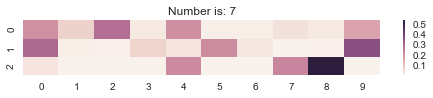

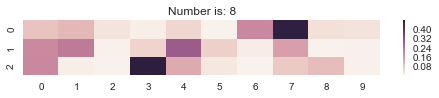

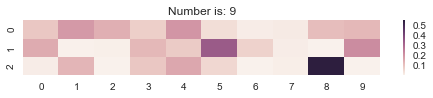

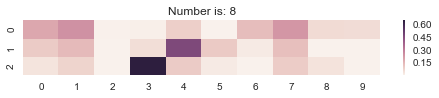

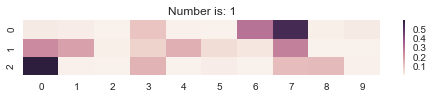

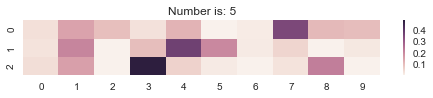

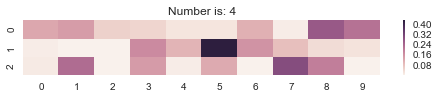

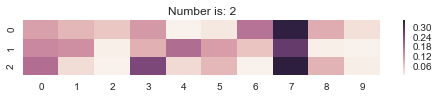

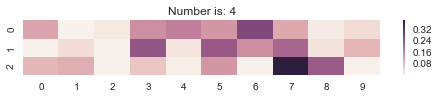

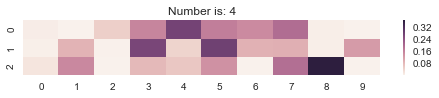

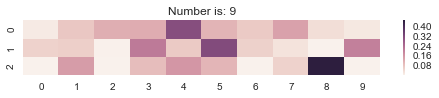

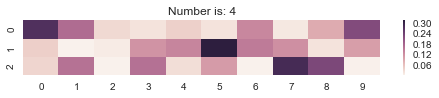

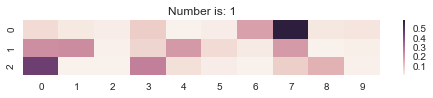

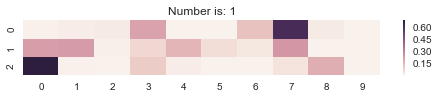

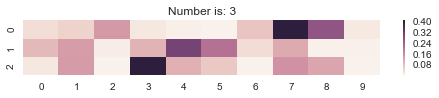

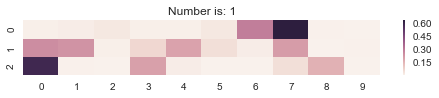

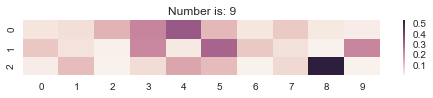

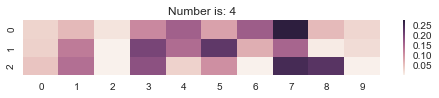

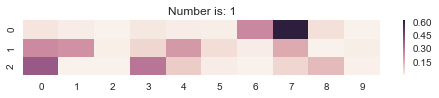

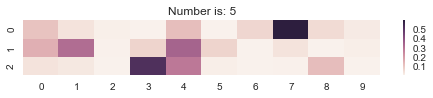

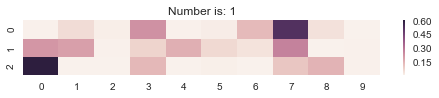

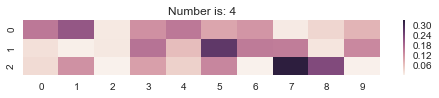

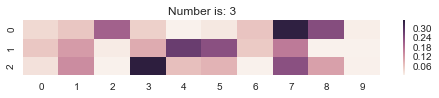

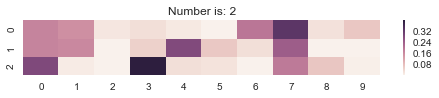

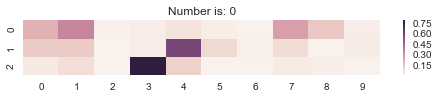

In [30]:
matplotlib.rcParams['figure.figsize'] = 10,10
num_test_digits = 25

plot_num = num_test_digits * 100 + 11
for i in range(num_test_digits):
    plt.figure(figsize = (8, 1))
    plt.title('Number is: '+str(labels[i]))
    sns.heatmap(gates[i,:,:])


In [33]:
# Compute cosine similarity
gate_vectors = np.reshape(gates[:num_test_digits,:,:], (num_test_digits, parameter_dict['L']*parameter_dict['M']))
gate_vectors = np.transpose(gate_vectors)

trial = 2
output = np.zeros(num_test_digits)
for i in range(num_test_digits):
    a = gate_vectors[trial][:]
    b = gate_vectors[i][:]
    an = a/np.linalg.norm(a)
    bn = b/np.linalg.norm(b)
    output[i] = np.dot(an,bn)

print(output)
elems = np.argsort(output)
print(elems[::-1])

[ 0.47106459  0.42873611  1.          0.42744881  0.62652725  0.39367607
  0.26653748  0.34567084  0.62797823  0.5514616   0.52171415  0.32428733
  0.54865224  0.58585462  0.3993836   0.73004031  0.47002388  0.33094561
  0.26774061  0.76883631  0.13041666  0.6046295   0.36923477  0.37388982
  0.70029476]
[ 2 19 15 24  8  4 21 13  9 12 10  0 16  1  3 14  5 23 22  7 17 11 18  6 20]


In [34]:
# Close all figures (so they don't stay open in memory)
plt.close('all')

## t-SNE of the gates
<br>

In [35]:
gates_reshaped = np.reshape(gates, [gates.shape[0], -1])
print(gates_reshaped.shape) # sanity check
independent_labels = list(set(labels))
print(independent_labels) # sanity check

model = TSNE(n_components=2, perplexity=30.0, early_exaggeration=4.0, learning_rate=1000.0, 
     n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', 
     init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5) # Defualts

x = model.fit_transform(gates_reshaped)
y = labels

(100, 30)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [36]:
# Dirty manual method (good enough for mnist)
mask0 = y == 0
x0 = x[mask0]
mask1 = y == 1
x1 = x[mask1]
mask2 = y == 2
x2 = x[mask2]
mask3 = y == 3
x3 = x[mask3]
mask4 = y == 4
x4 = x[mask4]
mask5 = y == 5
x5 = x[mask5]
mask6 = y == 6
x6 = x[mask6]
mask7 = y == 7
x7 = x[mask7]
mask8 = y == 8
x8 = x[mask8]
mask9 = y == 9
x9 = x[mask9]


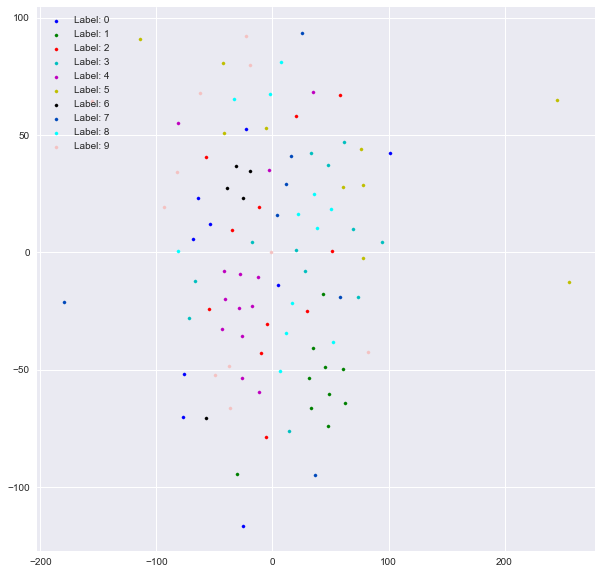

In [37]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x0[:,0], x0[:,1], s=10, c='b', label='Label: 0')
ax1.scatter(x1[:,0], x1[:,1], s=10, c='g', label='Label: 1')
ax1.scatter(x2[:,0], x2[:,1], s=10, c='r', label='Label: 2')
ax1.scatter(x3[:,0], x3[:,1], s=10, c='c', label='Label: 3')
ax1.scatter(x4[:,0], x4[:,1], s=10, c='m', label='Label: 4')
ax1.scatter(x5[:,0], x5[:,1], s=10, c='y', label='Label: 5')
ax1.scatter(x6[:,0], x6[:,1], s=10, c='k', label='Label: 6')
ax1.scatter(x7[:,0], x7[:,1], s=10, c='#0048BA', label='Label: 7')
ax1.scatter(x8[:,0], x8[:,1], s=10, c='#00FFFF', label='Label: 8')
ax1.scatter(x9[:,0], x9[:,1], s=10, c='#F4C2C2', label='Label: 9')
plt.legend(loc='upper left');
plt.show()